# Loading libraries and data 

In [7]:
import os
import glob
import pickle
import random
import numpy as np
import pandas as pd
import sklearn
from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder
#from scipy.io import imread, imsave
from scipy.misc import imresize, imsave
from scipy.ndimage import imread

# loading the data
w, h = 640 // 8, 480 // 8
n_classes = 10

def load_image(path):
    return np.ravel(imresize(imread(path,flatten=True), (h, w)))

def load_train(folder):
    driver_imgs_list = pd.read_csv('/home/ilyes/Test Memoire/Data/driver_imgs_list.csv')
    driver_imgs_grouped = driver_imgs_list.groupby('classname')
    
    X_train = []
    y_train = []
    driver_ids = []

    print('Reading train images...')
    for j in range(n_classes):
        print('Loading folder c{}...'.format(j))
        driver_ids_group = driver_imgs_grouped.get_group('c{}'.format(j))
        paths = os.path.join(folder, 'c{}/'.format(j)) + driver_ids_group.img
        driver_ids += driver_ids_group['subject'].tolist()

        for i, path in tqdm(enumerate(paths), total=len(paths)):
            img = load_image(path)
            X_train.append(img)
            y_train.append(j)

    X_train = np.array(X_train)
    y_train = np.array(y_train)


    return X_train, y_train, driver_ids

def load_test(folder):
    X_test = []
    X_test_id = []
    paths = glob.glob('{}*.jpg'.format(base))

    print('Reading test images...')
    for i, path in tqdm(enumerate(paths), total=len(paths)):
        id = os.path.basename(path)
        img = load_image(path)

        X_test.append(img.ravel())
        X_test_id.append(id)

    X_test = np.array(X_test)
    X_test_id = np.array(X_test_id)

    return X_test, X_test_id

X_train, y_train, driver_ids = load_train('/home/ilyes/Test Memoire/Data/train/')
#X_test, X_test_ids = load_test('/home/ilyes/Test Memoire/Data/test/')

  0%|          | 0/2489 [00:00<?, ?it/s]/home/ilyes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
/home/ilyes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  0%|          | 2/2489 [00:00<03:05, 13.38it/s]

Reading train images...
Loading folder c0...


  0%|          | 4/2267 [00:00<01:01, 36.84it/s]

Loading folder c1...


  0%|          | 5/2317 [00:00<00:50, 45.58it/s]

Loading folder c2...


  0%|          | 5/2346 [00:00<01:16, 30.75it/s]

Loading folder c3...


  0%|          | 3/2326 [00:00<01:26, 26.88it/s]

Loading folder c4...


  0%|          | 4/2312 [00:00<01:23, 27.49it/s]

Loading folder c5...


  0%|          | 5/2325 [00:00<00:49, 47.26it/s]

Loading folder c6...


  0%|          | 6/2002 [00:00<00:34, 57.87it/s]

Loading folder c7...


  0%|          | 4/1911 [00:00<00:48, 39.36it/s]

Loading folder c8...


  0%|          | 5/2129 [00:00<00:42, 49.91it/s]

Loading folder c9...


100%|██████████| 2129/2129 [00:34<00:00, 61.11it/s]


## splitting the data 

In [3]:
from sklearn.model_selection import train_test_split
X_t, X_s, y_t, y_s = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

## extracting features using ExtraTreesClassifier 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_t, y_t)
print(model.feature_importances_)

[4.24866353e-05 6.61073332e-05 2.19679134e-04 ... 1.86265097e-04
 1.90896288e-04 2.26075191e-04]


# Creating the 6 classifier using previous features

In [ ]:
# initializing variables
trees=range(6)
error = np.zeros(6)
accuracy_s=np.zeros(6)
accuracy_t=np.zeros(6)
depth = 4
j = 1
for i in range(1,len(trees)):
    classifier=RandomForestClassifier(n_estimators=i + 1,max_depth=depth)
    classifier=classifier.fit(X_t,y_t)
    accuracy_t[i] = sklearn.metrics.accuracy_score(y_t,classifier.predict(X_t))
    predictions=classifier.predict(X_s)
    accuracy_s[i]=sklearn.metrics.accuracy_score(y_s, predictions)
    error[i] = sklearn.metrics.log_loss(y_s, predictions)
    j+=1
    depth = depth + 4 

## Plotting training and test accuracy and the loss

In [ ]:
im, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].plot(trees, accuracy_t,'r',label = 'Train')
axs[0].plot(trees, accuracy_s, label = 'Test')
axs[0].set_title('Accuracy of train and test data')
axs[0].legend()

axs[1].plot(trees, error,label='error')
axs[1].set_title('error')

## Calculate the confusion matrix of the sixth classifier

In [58]:
classifier=RandomForestClassifier(n_estimators=5,max_depth=20)
classifier=classifier.fit(X_t,y_t)
ypred = classifier.predict(X_s)
y_test_non_category = [ np.argmax(t) for t in y_s ]
y_predict_non_category = [ np.argmax(t) for t in ypred ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)


## Plotting the confusion matrix of the sixth classifier.

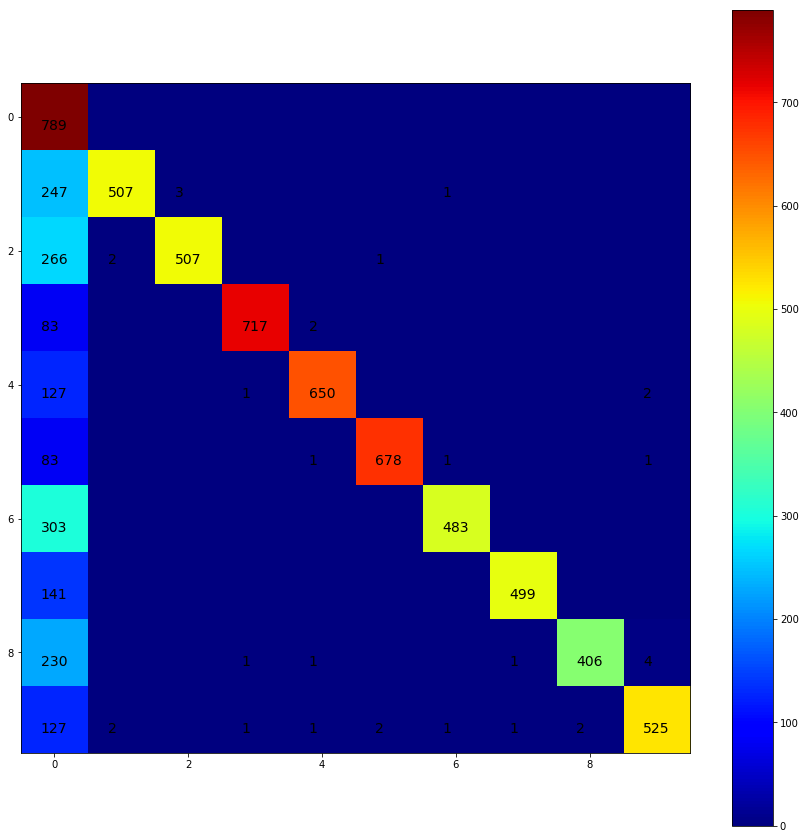

In [59]:
import matplotlib.pyplot as plt
from pylab import *
plt.clf()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
res = ax.imshow(np.array(conf_mat), cmap=cm.jet, interpolation='nearest')
cb = fig.colorbar(res)
savefig("confmat.png", format="png")
res = ax.imshow(array(conf_mat), cmap=cm.jet, interpolation='nearest')
for i, cas in enumerate(conf_mat):
    for j, c in enumerate(cas):
        if c>0:
            plt.text(j-.2, i+.2, c, fontsize=14)